<div class="alert alert-block alert-success">
    
# FIT5201 Task 3
#### Student Name: Mohammed Hasan Uddin Quraishi
#### Student ID: 31064191
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[3 Ridge Regression](#q3)<br>
$\;$[Question 6 Ridge Regression](#ridgereg) <br>
$\;\;\;$[I Analytically derive Weight update](#Analytically) <br>
$\;\;\;$[II Implement SGD Regressor with ridge](#implementridgessgd) <br>
$\;\;\;$[III Effect of L2 Regularization on train and test](#effectl2) <br>

<div class="alert alert-block alert-warning">

#### 3 Ridge Regression<a class="anchor" name="q3"></a>

<div class="alert alert-block alert-warning">

#### Question 6 Ridge Regression <a class="anchor" name="ridgereg"></a>
    
</div>

<div class="alert alert-block alert-warning">

#### I Derive the weight update steps of stochastic gradient descent (SGD) for linear regressionwith L2 regularisation norm or a system of linear equations that uniquely determine theminimum of the regularised error function. Give this derivation with enough explanation in amarkdown cell (ideally using Latex for readable math typesetting). The starting point is thedefinition of the regularised error function and the end result is either the weight update step for this function in (stochastic) gradient descent or a system of linear equations described in matrix/vector notation <a class="anchor" name="Analytically"></a>
    
</div>

function with sum of squared error
$$
E(w) = \frac{1}{2} \sum_{n=1}^{N} \frac{1}{N}(t_n - y(x_n,w))^2   \\
$$

L2 Ridge regression is used to give penalty for overfit and is given by:
  
$$
E(w) = \frac{1}{2} \sum_{n=1}^{N} \frac{1}{N}(t_n - y(x_n,w))^2 + \frac{\lambda}{2} \lVert w \rVert^2
$$

where $$ {\lambda} $$ is the regularization parameter

By using basis function we get
$$
y(\mathbf{x}, \mathbf{w}) = \boldsymbol{\phi}(\mathbf{x_n})\cdot \mathbf{w}
$$

We get following by substitution
$$
E(w) = \frac{1}{2} \sum_{n=1}^{N_b} \frac{1}{N_b} (t_n - \boldsymbol{\phi}(\mathbf{x_n})\cdot \mathbf{w})^2 + \frac{\lambda}{2} \lVert w \rVert^2
$$

where $$ \|w\|=\sqrt{\sum_{j=1}^p w_j^2} $$


Combine and do partial derivative with respect to w_i
\begin{aligned}
\frac{\partial E}{\partial w_i} & =\frac{\partial}{\partial w_i}\left(\frac{1}{2} \sum_{n=1}^{N_b} \frac{1}{N_b}\left(t_n-\phi\left(x_n\right) \cdot w\right)^2+\frac{\lambda}{2} \sum_{j=1}^p w_j^2\right) \\
& =\frac{\partial}{\partial w_i}\left(\frac{1}{2} \sum_{n=1}^{N_b} \frac{1}{N_b}\left(t_n-\phi\left(x_n\right) \cdot w\right)^2\right)+\frac{\partial}{\partial w_i}\left(\frac{\lambda}{2} \sum_{j=1}^p w_j^2\right) \\
& =- \sum_{n=1}^{N_b} \frac {1}{N_b} \left(t_n-\phi\left(x_n\right) \cdot w\right)\cdot \phi\left(x_i\right)+\lambda w \\
& \tilde\nabla E=-\frac{1}{N_b} \phi_i^T(t-\phi w)+\lambda w
\end{aligned}


Gradient descent weight update:
$$
\mathbf{w}_{\tau} = \mathbf{w}_{\tau-1} - \eta \tilde\nabla E(\mathbf{w}_{\tau-1})$$

and stochastic gradient descent by iterative gradient vector on each data batch:

\begin{align*}
\tilde\nabla E({w}_{\tau-1})=\frac{1}{N_b} \phi_i^T(\phi {w}_{\tau-1}-t)+\lambda {w}_{\tau-1}
\end{align*}

Stochastic gradient descent each step update:
\begin{align*}
\mathbf{w}_{\tau} = \mathbf{w}_{\tau-1} - \eta ( \frac{1}{N_b} \phi_i^T(\phi {w}_{\tau-1}-t)+\lambda {w}_{\tau-1})\\
\end{align*}

<div class="alert alert-block alert-warning">

#### II Using the analytically derived gradient from Step I, implement either a direct or a (stochastic)gradient descent algorithm for Ridge Regression (use again the usual template with init ,fit, and predict methods. You cannot use any import from sklearn.linear model for this task. <a class="anchor" name="implementridgessgd"></a>
    
</div>

In [2]:
#Importing necessary libraries

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline


Using the SGD Regressor we will add the Ridge regressor weight update step obtained above and add a parameter lambda(Since there is an existing lambda we will call this lamda)

In [3]:
class SGDRidgeRegressor:

    def __init__(self, batch_size=1, eta=0.01, tau_max=1000, epsilon=0.00001, lamda = 0.1, random_state=None):
        self.eta = eta
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.random_state = random_state
        self.batch_size = batch_size
        self.lamda=lamda
    def fit(self, x, y):
        RNG = np.random.default_rng(self.random_state)
        n, p = x.shape
        self.w_ = np.zeros(shape=(self.tau_max+1, p))
        for tau in range(1, self.tau_max+1):
            idx = RNG.choice(n, size=self.batch_size, replace=True)
            #Weight update step
            grad = x[idx].T.dot(x[idx].dot(self.w_[tau-1])-y[idx])/self.batch_size + (self.lamda)*(self.w_[tau-1])
            self.w_[tau] = self.w_[tau-1] - self.eta*grad
            if np.linalg.norm(self.w_[tau]-self.w_[tau-1]) < self.epsilon:
                break
        self.coef_ = self.w_[tau]
        self.w_ = self.w_[:tau+1]
        return self

    def predict(self, x):
        return x.dot(self.coef_)


<div class="alert alert-block alert-warning">

#### III Study the effect of the L2-regularization on the training and testing errors, using the synthetic data generator from Activity 2.3.<a class="anchor" name="effectl2"></a>
    
</div>

\begin{equation}
X ∼ Uniform(−0.3, 0.3) \\
Y = \frac{sin(5πx)}{1 + 2x} + \epsilon \\
ϵ ∼ N(0, 0.1)
\end{equation}

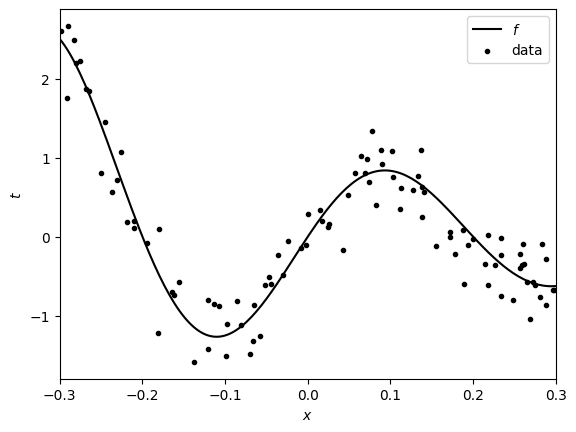

In [4]:
def f(x):
    return np.sin(5*np.pi*x)/(1+2*x)

def make_additive_noise_data(n, f, a, b, noise=0.1**0.5, random_state=None):
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    return x, y

def plot_function(f, a, b, models=[], data=None, ax=None, ax_labels=True, legend=True):
    ax = plt.gca() if ax is None else ax
    xx = np.linspace(a, b, 200).reshape(-1, 1)
    if len(models)==1:
        ax.fill_between(xx.squeeze(), f(xx).squeeze(), models[0].predict(xx).squeeze(), alpha=0.3)
        ax.plot(xx, models[0].predict(xx), label='$y$')
    if len(models) > 1:
        for model in models: ax.plot(xx, model.predict(xx), color='gray', alpha=0.5)
    ax.plot(xx, f(xx), color='black', label='$f$')
    if data is not None:
        x, y = data
        ax.scatter(x, y, marker='.', color='black', label='data')
    if ax_labels:
        ax.set_xlabel('$x$')
        ax.set_ylabel('$t$')
    if legend: ax.legend()
    ax.margins(x=0)

plot_function(f, -0.3, 0.3, data=make_additive_noise_data(100, f, -0.3, 0.3, random_state=0))
plt.show()

a Consider the ridge regression model for each λ in {10−10+9i/100
, . . . , 10−1
: 0 ≤ i ≤ 100}
by creating a pipeline of your implemented ridge regressor with a polynomial feature
transformer with degree 5.
Hint: You can create an array with the above choices for λ via numpy.geomspace(10**-10,
0.1, 101, endpoint=True).

In [5]:
class PolynomialFeatures:

    def __init__(self, degree):
        self.degree = degree

    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        output = []
        for i in range(0, self.degree+1):
            column = x**i
            output.append(column)
        return np.column_stack(output)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x, y)

This pipeline will help us streamline the transform step which we will later save as models to use it for each lambda.

For each lambda value we obtain we will make a model using the SGDRidgeRegressor

In [6]:
from sklearn.pipeline import make_pipeline

# define the range of lambda values
lambdas = list(np.geomspace(10**-10, 0.1, 101, endpoint=True))

model = []
for lamda_val in lambdas:
    pipeline = make_pipeline(
        PolynomialFeatures(degree=5),
        SGDRidgeRegressor(lamda = lamda_val))
    model.append(pipeline)


In [7]:
model[1]

Pipeline(steps=[('polynomialfeatures',
                 <__main__.PolynomialFeatures object at 0x78759c2d52a0>),
                ('sgdridgeregressor',
                 <__main__.SGDRidgeRegressor object at 0x78759c2d7520>)])

b Fit each model at least ten times (resampling a training dataset of size 20 each time)
for all choices of λ. To reduce the variance of the experiment make sure that for each
repetition all models use the same training dataset (i.e., make the repetitions the outer
loop and the choices of λ the inner loop, and sample only one training set per outer
loop).

In [9]:
#As per hint large amount of test data
x_test, y_test = make_additive_noise_data(10000, f, -0.3, 0.3)
#for each model 10 training set we will store the mse values
train_mse_model= np.zeros(shape=(10,len(model)))
test_mse_model = np.zeros(shape=(10,len(model)))
for i in range(10):
  x_train, y_train = make_additive_noise_data(20, f, -0.3, 0.3)
  y_train = np.ravel(y_train)
  for index, each_model in enumerate(model):
      each_model.fit(x_train, y_train)
      y_pred_train = each_model.predict(x_train)
      y_pred_test = each_model.predict(x_test)
      train_mse_model[i, index] = mean_squared_error(y_train, y_pred_train)
      test_mse_model[i, index] = mean_squared_error(y_test, y_pred_test)

c Create a plot of mean squared errors (use different colors for the training and testing
errors), where the x-axis is log lambda and y-axis is the log mean squared error. Discuss
λ, model complexity, and error rates, corresponding to underfitting and overfitting, by
observing your plot.

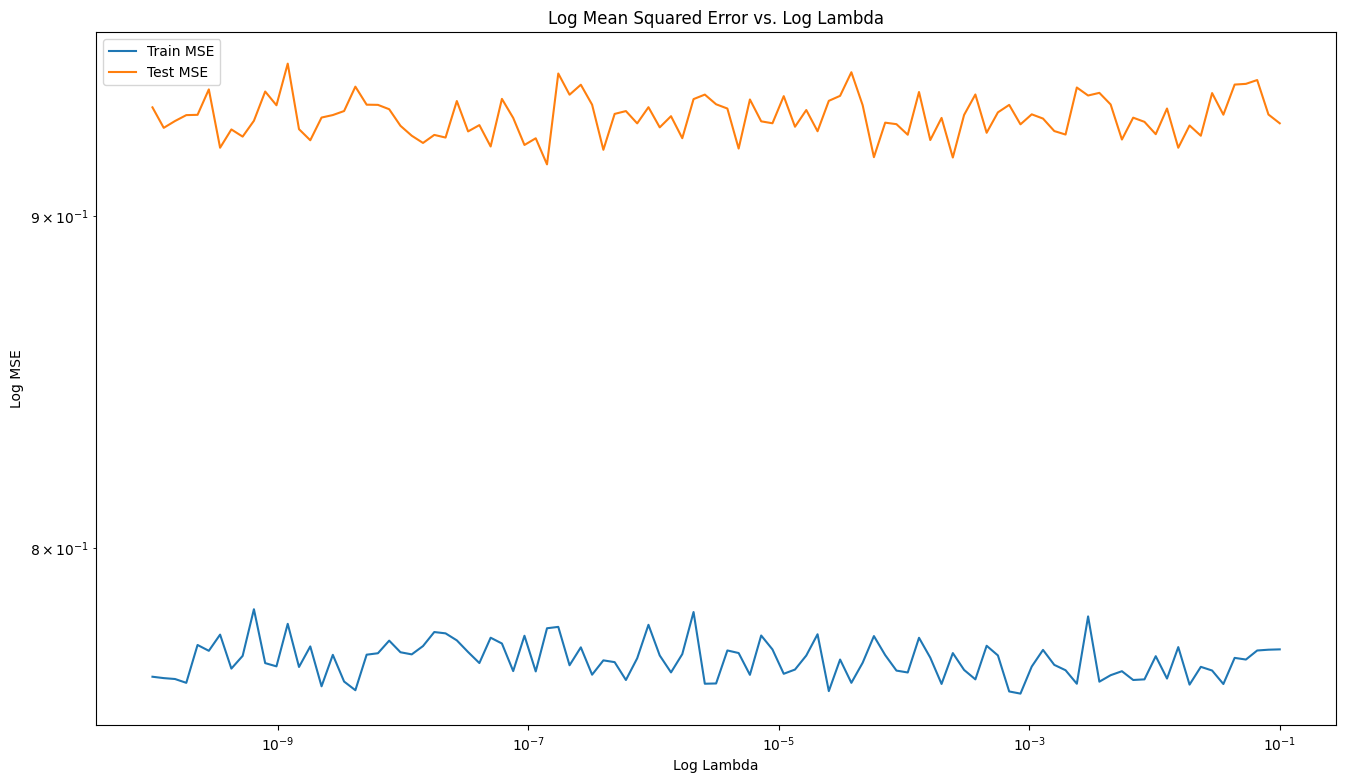

In [ ]:
import matplotlib.pyplot as plt

# obtain the mean for each model
train_mse = np.mean(train_mse_model, axis=0)
test_mse = np.mean(test_mse_model, axis=0)

plt.figure(figsize=(16,9))
plt.plot(lambdas, train_mse, label='Train MSE')
plt.plot(lambdas, test_mse, label='Test MSE')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log Lambda')
plt.ylabel('Log MSE')
plt.title('Log MSE vs. Log Lambda')
plt.show()

 Discuss
λ, model complexity, and error rates, corresponding to underfitting and overfitting, by
observing your plot.

The data looks noisy and we can see that for our test MSE the error decrease as lambda values increases. However that is not the case for all values.

When lambda is too small the error value increase significantly due to overfitting. Also around lamda 10 power -6 the error increases due to overfitting.

Also if lambda value is too huge the model underfits.

References

1. Activity 1 2 3 from tutorial
2. data:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html,
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html ,
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

3. Total Conditional Probability:
https://corporatefinanceinstitute.com/resources/data-science/total-probability-rule/#:~:text=The%20Total%20Probability%20Rule%20(also,probabilities%20of%20several%20distinct%20events.

4. Conditional and Bayes rule:
https://stats.libretexts.org/Courses/Saint_Mary's_College_Notre_Dame/MATH_345__-_Probability_(Kuter)/2%3A_Computing_Probabilities/2.2%3A_Conditional_Probability_and_Bayes'_Rule

5. Change to one dimension flat array: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

6. knn regressor:
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

7. Analysis and markdown guide:
https://chat.openai.com/

8.Ridge regression help:
https://www.springboard.com/blog/data-science/ridge-regression-python/


